In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns



In [ ]:
dataset= pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')

In [ ]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


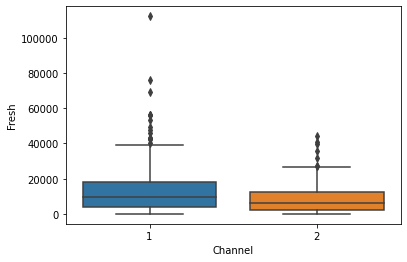

In [ ]:
ax = sns.boxplot(x="Channel", y="Fresh", data=dataset)

In [ ]:
#1=hotel,cafe 2=retail

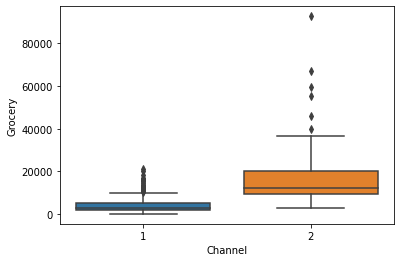

In [ ]:
ax = sns.boxplot(x="Channel", y="Grocery", data=dataset)

In [ ]:
new_dataset=dataset.drop(labels=['Channel','Region'],axis=1)          #dropped first 2 columns ...categorical

In [ ]:
from sklearn.preprocessing import StandardScaler                       #feature scaling
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(new_dataset)


In [ ]:
scaleddata


array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [ ]:
#in kmeans method to find optimum k value

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squareddist = []
K = range(1,20)
for i in K:
    m = KMeans(n_clusters=i)
    m = m.fit(scaled_dataset)
    Sum_of_squareddist.append(m.inertia_)

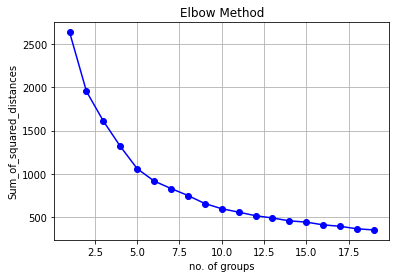

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squareddist,'bo-')
plt.grid(True)
plt.xlabel('no. of groups')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()


In [ ]:
#kmeans k=5

In [ ]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(scaleddata)
y=Kmean.fit_predict(scaleddata)
print(y)

[0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 4 0 0 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 0 0 0 4 0 0 2 2 0 0 2 2 4 0 2 2 0 4 0 0 2 4 2 0 2 2 2 2 2 0
 0 2 2 0 2 2 2 0 0 2 0 4 4 2 2 2 2 2 4 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 4 2 3 2
 2 2 2 0 0 2 2 2 0 2 2 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 4 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 4 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 4 1 0 1 1 1 1 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 0 0 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


In [ ]:
Kmean.cluster_centers_              #centroids

array([[ 1.44865163e+00,  1.69928497e-01, -3.06362835e-01,
         4.17500207e-01,  6.51879518e-01, -3.57269701e-01,
         6.76847966e-01,  6.33174701e-03],
       [-5.74049873e-01, -1.58776439e+00,  3.22040971e-02,
        -3.24809935e-01, -3.91593636e-01,  2.08356115e-01,
        -4.23471344e-01, -1.15896320e-01],
       [-6.90297086e-01,  5.90668285e-01,  1.02719458e-01,
        -3.56479221e-01, -4.43587243e-01,  7.52790095e-02,
        -4.43491947e-01, -9.31373298e-02],
       [-6.90297086e-01,  5.90668285e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01],
       [ 1.27040590e+00,  5.19161179e-02,  1.01697969e+00,
         3.88384518e+00,  3.77602602e+00,  2.67775570e-01,
         3.91009990e+00,  1.07099298e+00]])

In [ ]:
new_dataset["clusterno"]=y
new_dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterno
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,0


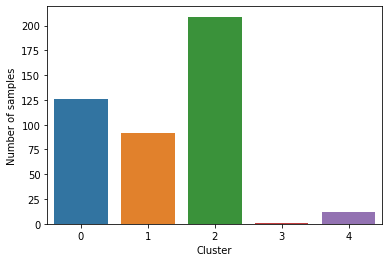

In [ ]:

unique_val, count = np.unique(y, return_counts=True)
sns.barplot(unique_val, count)
plt.xlabel("Cluster")
plt.ylabel("Number of samples");
